In [25]:
import pandas as pd
import numpy as np 
import math
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test 
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('C:/Users/mussie/Music/servival analysis/turnover.csv', encoding='latin1')

In [4]:
df.head(3)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3


In [5]:
# Missing Value Detection
df.isna().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

C:\Users\mussie\AppData\Local\Temp\ipykernel_3404\2577119729.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'stag'}>,
        <Axes: title={'center': 'event'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'extraversion'}>,
        <Axes: title={'center': 'independ'}>,
        <Axes: title={'center': 'selfcontrol'}>],
       [<Axes: title={'center': 'anxiety'}>,
        <Axes: title={'center': 'novator'}>, <Axes: >]], dtype=object)

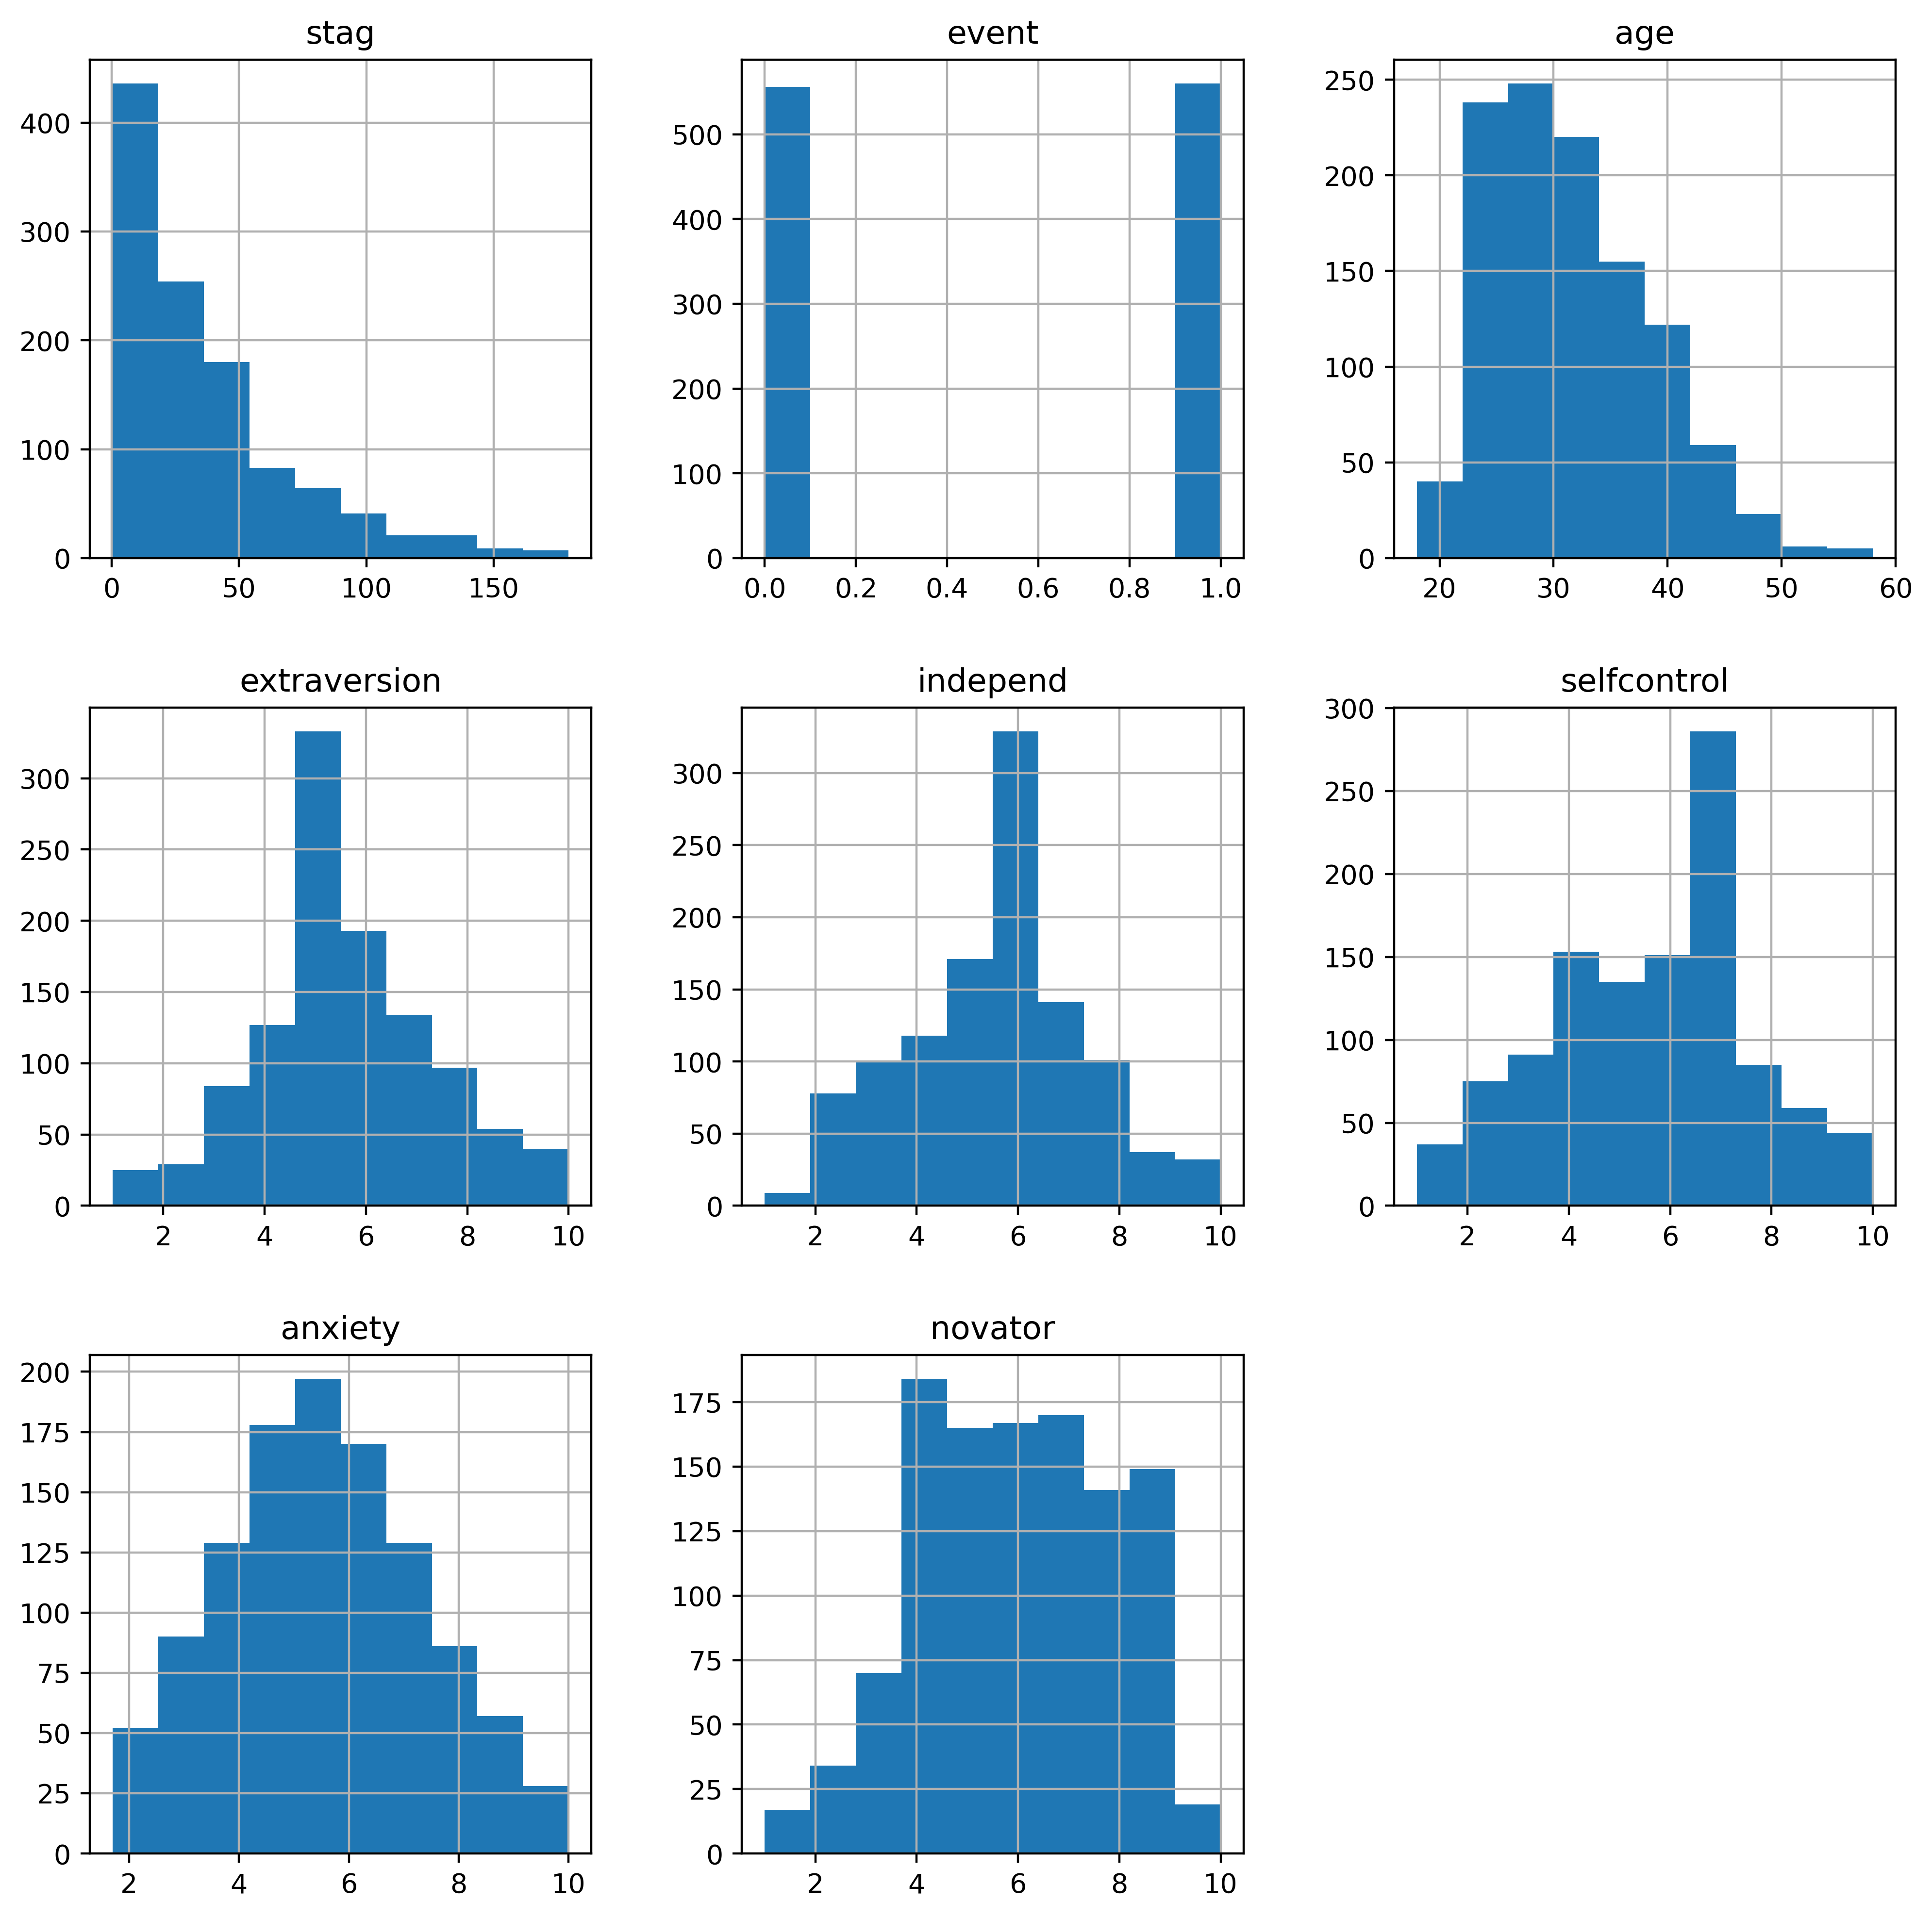

In [23]:
## Distribution histograms for numeric variables
fig, ax = plt.subplots(figsize = (12, 12), dpi = 400)
df.hist(ax = ax)

In [6]:
# Duplicate Data Detection
df = df.drop_duplicates(keep='first')\
                    .reset_index(drop=True)

In [8]:
T = df['stag']
E = df["event"]

#fitting the model with our time befor the event and the event

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1116 total observations, 556 right-censored observations>

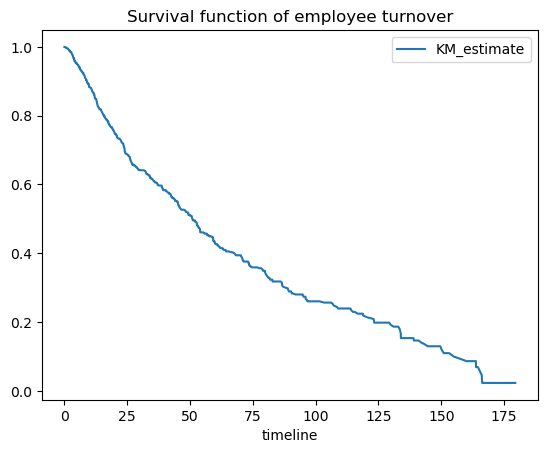

In [9]:
kmf.survival_function_.plot()
plt.title('Survival function of employee turnover');

<Axes: xlabel='timeline'>

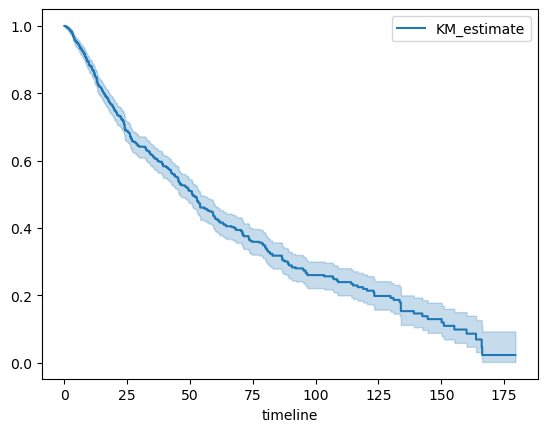

In [10]:
kmf.plot_survival_function()

As time 0 our employees have 100 % of serviving the turnover .but as we increase the time from 0 -25 month they have 85% change of leaving .
finally as time >165 we have almost 90% of leaving thair jobs. 

we can also see which factore is contributing to our seviving time model below

In [11]:
# aroud 50% 0f our employee have probabiltiy of leaving after 50 month of work time with us.

kmf.median_survival_time_

50.98973306

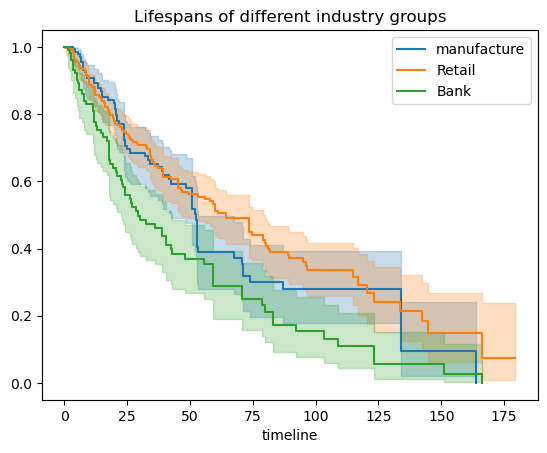

In [15]:
ax = plt.subplot(111)
man = (df["industry"] == "manufacture")
ret = (df["industry"] == "Retail")
bank = (df["industry"] == "Banks")

kmf.fit(T[man], event_observed=E[man], label="manufacture")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[ret], event_observed=E[ret], label="Retail")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[bank], event_observed=E[bank], label="Bank")
kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different industry groups");

from our industry groups in the above those who work in retail stay more than those manufacturing and bankers.

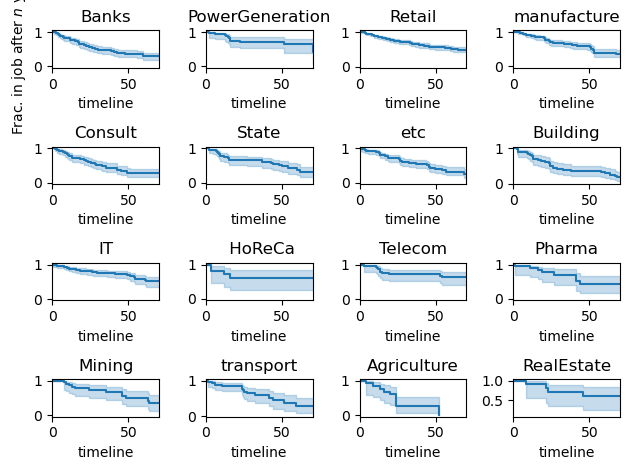

In [31]:
industry_types = df['industry'].unique()
num_industries = len(industry_types)
num_rows = 4  # Adjust the number of rows as desired
num_cols = math.ceil(num_industries / num_rows)

for i, industry_type in enumerate(industry_types):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    ix = df['industry'] == industry_type
    kmf.fit(T[ix], E[ix], label=industry_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(industry_type)
    plt.xlim(0, 70)

    if i==0:
        plt.ylabel('Frac. in job after $n$ years')

plt.tight_layout()